## Setup

In [163]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import joblib
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

%matplotlib inline

## Get the data 

In [132]:
data = pd.read_csv("winequality-red.csv")

In [133]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Initial look 

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [135]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


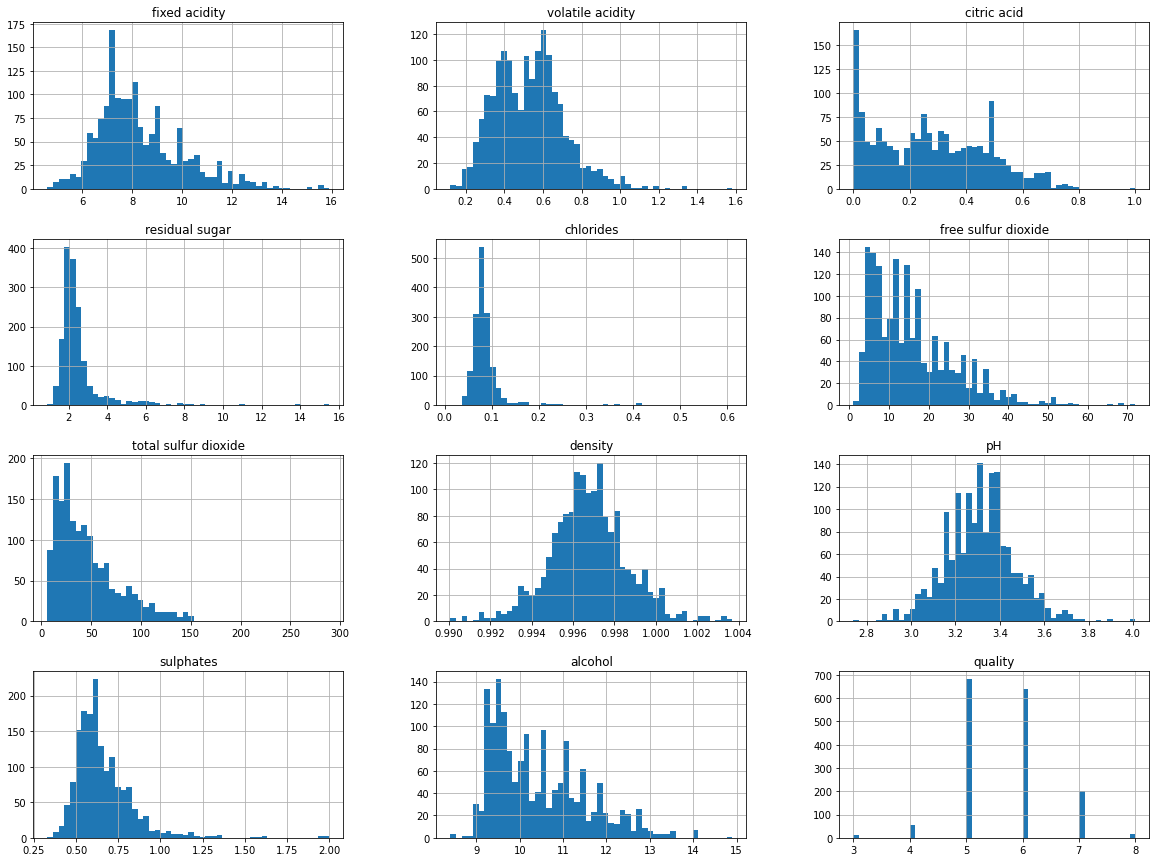

In [136]:
data.hist(bins=50, figsize=(20,15))
plt.show()

## Split into test and train - stratified

In [137]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["quality"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [138]:
test_set["quality"].value_counts() / len(test_set)

5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: quality, dtype: float64

In [139]:
data["quality"].value_counts() / len(data)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

#### Check if output category is similar in train and test

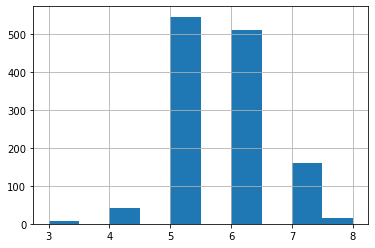

Average quality: 5.63721657544957


In [140]:
train_set["quality"].hist()
plt.show()
print("Average quality:",np.average(train_set["quality"]))

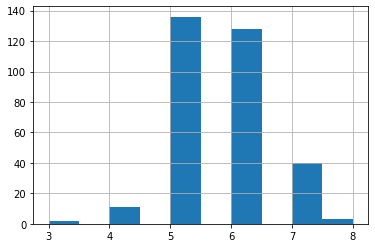

Average quality: 5.63125


In [141]:
test_set["quality"].hist()
plt.show()
print("Average quality:",np.average(test_set["quality"]))

In [142]:
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5
344,11.9,0.570,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,6
924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,5
971,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,6


In [143]:
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
963,8.8,0.27,0.39,2.0,0.100,20.0,27.0,0.99546,3.15,0.69,11.2,6
475,9.6,0.68,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
329,10.7,0.46,0.39,2.0,0.061,7.0,15.0,0.99810,3.18,0.62,9.5,5
149,8.2,0.40,0.44,2.8,0.089,11.0,43.0,0.99750,3.53,0.61,10.5,6


## More insight

In [144]:
wines = train_set.copy()

In [145]:
corr = wines.corr()
corr["quality"].sort_values(ascending= False)

quality                 1.000000
alcohol                 0.481197
sulphates               0.228050
citric acid             0.210802
fixed acidity           0.107940
residual sugar          0.003710
free sulfur dioxide    -0.048291
pH                     -0.052063
chlorides              -0.120231
density                -0.193009
total sulfur dioxide   -0.194511
volatile acidity       -0.383249
Name: quality, dtype: float64

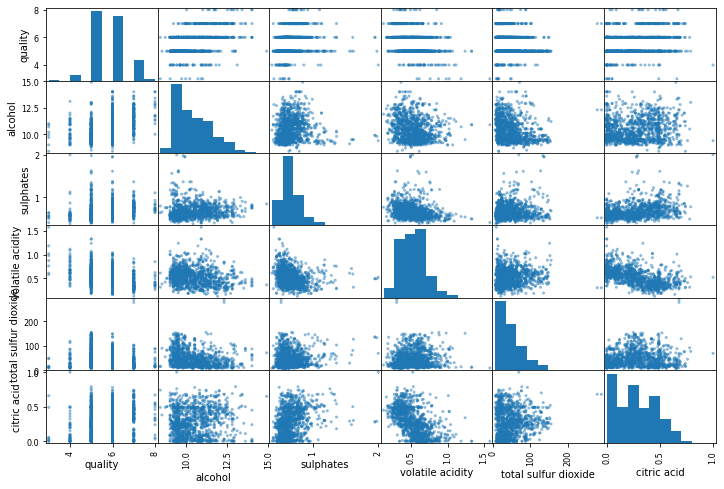

In [146]:
columns = ["quality","alcohol","sulphates","volatile acidity", "total sulfur dioxide","citric acid"]
scatter_matrix(wines[columns], figsize=(12, 8))
plt.show()

## Pipeline

In [147]:
y_train = train_set["quality"]
X_train = train_set.drop(["quality"], axis = 1)

In [148]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1542,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1558,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
924,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
971,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1056,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10
1394,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


In [152]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #no empty value, but just to be sure
        ('std_scaler', StandardScaler())
    ])

num_cols = list(X_train)

transformer = ColumnTransformer([
        ("num", num_pipeline, num_cols)
        #("cat", OneHotEncoder(), cat_cols),
    ])

X_train_trans = transformer.fit_transform(X_train)

In [153]:
X_train_trans[0]

array([-0.94797009,  1.84038456, -1.30310213, -0.46801054, -0.48927942,
        1.22949584, -0.27851741, -1.08849143, -0.05665069, -0.58149257,
        0.30561112])

## Training

In [154]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_trans, y_train)

RandomForestRegressor(random_state=42)

#### Evaluation

In [155]:
scores = cross_val_score(forest_reg, X_train_trans, y_train,
                         scoring="neg_mean_squared_error", cv=10)

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.62097517 0.64460562 0.53551523 0.56953037 0.47434659 0.55100406
 0.52027261 0.6325951  0.66051117 0.68562805]
Mean: 0.5894983968410934
Standard deviation: 0.06558620986111337


## Fine tuning

In [156]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 100, 300], 'max_features': [2, 3, 4, 10]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, verbose = 2)
grid_search.fit(X_train_trans, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ................... max_features=2, n_estimators=3, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] .................. max_features=2, n_estimators=10, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. max_features=2, n_estimators=30, total=   0.1s
[CV] max_features=2, n_estimators=30 .................................
[CV] .................. max_features=2, n_estimators=30, total=   0.1s
[CV] max_features=2, n_estimators=30 .................................
[CV] .................. max_features=2, n_estimators=30, total=   0.1s
[CV] max_features=2, n_estimators=30 .................................
[CV] .................. max_features=2, n_estimators=30, total=   0.1s
[CV] max_features=2, n_estimators=30 .................................
[CV] .................. max_features=2, n_estimators=30, total=   0.1s
[CV] max_features=2, n_estimators=100 ................................
[CV] ................. max_features=2, n_estimators=100, total=   0.2s
[CV] max_features=2, n_estimators=100 ................................
[CV] ................. max_features=2, n_estimators=100, total=   0.2s
[CV] max_features=2, n_estimators=100 ................................
[CV] .

[CV] .................. max_features=8, n_estimators=10, total=   0.0s
[CV] max_features=8, n_estimators=10 .................................
[CV] .................. max_features=8, n_estimators=10, total=   0.0s
[CV] max_features=8, n_estimators=30 .................................
[CV] .................. max_features=8, n_estimators=30, total=   0.1s
[CV] max_features=8, n_estimators=30 .................................
[CV] .................. max_features=8, n_estimators=30, total=   0.1s
[CV] max_features=8, n_estimators=30 .................................
[CV] .................. max_features=8, n_estimators=30, total=   0.1s
[CV] max_features=8, n_estimators=30 .................................
[CV] .................. max_features=8, n_estimators=30, total=   0.1s
[CV] max_features=8, n_estimators=30 .................................
[CV] .................. max_features=8, n_estimators=30, total=   0.1s
[CV] max_features=8, n_estimators=100 ................................
[CV] .

[CV] . bootstrap=False, max_features=4, n_estimators=10, total=   0.0s
[CV] bootstrap=False, max_features=4, n_estimators=100 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=100, total=   0.3s
[CV] bootstrap=False, max_features=4, n_estimators=100 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=100, total=   0.3s
[CV] bootstrap=False, max_features=4, n_estimators=100 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=100, total=   0.3s
[CV] bootstrap=False, max_features=4, n_estimators=100 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=100, total=   0.3s
[CV] bootstrap=False, max_features=4, n_estimators=100 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=100, total=   0.3s
[CV] bootstrap=False, max_features=4, n_estimators=300 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=300, total=   0.8s
[CV] bootstrap=False, max_features=4, n_estimators=300 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   36.0s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 10],
                          'n_estimators': [3, 10, 100, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [157]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 300}

In [158]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print()
print(f"Lowest RMSE on training set: {min(np.sqrt(-cvres['mean_test_score']))}")

0.7244274089279755 {'max_features': 2, 'n_estimators': 3}
0.6252646253512878 {'max_features': 2, 'n_estimators': 10}
0.6004639920252957 {'max_features': 2, 'n_estimators': 30}
0.5960069689066514 {'max_features': 2, 'n_estimators': 100}
0.6847223050815948 {'max_features': 4, 'n_estimators': 3}
0.617261802117174 {'max_features': 4, 'n_estimators': 10}
0.5975804604625049 {'max_features': 4, 'n_estimators': 30}
0.5922831786098738 {'max_features': 4, 'n_estimators': 100}
0.7055481575444578 {'max_features': 6, 'n_estimators': 3}
0.6272712652402295 {'max_features': 6, 'n_estimators': 10}
0.609764075416751 {'max_features': 6, 'n_estimators': 30}
0.5948591016337975 {'max_features': 6, 'n_estimators': 100}
0.704500153077538 {'max_features': 8, 'n_estimators': 3}
0.6210285832596517 {'max_features': 8, 'n_estimators': 10}
0.6026461145022166 {'max_features': 8, 'n_estimators': 30}
0.5936244291881202 {'max_features': 8, 'n_estimators': 100}
0.6828591631590218 {'bootstrap': False, 'max_features': 2, 

## Analysis of results and test evaluation

In [159]:
final_model = grid_search.best_estimator_

In [160]:
sorted(zip(feature_importances, X_train.columns), reverse=True)

[(0.48119737639814975, 'alcohol'),
 (0.22805038346308584, 'sulphates'),
 (0.21080211391019751, 'pH'),
 (0.10793977295738814, 'density'),
 (0.0037104950416533924, 'total sulfur dioxide'),
 (-0.04829065715280893, 'free sulfur dioxide'),
 (-0.05206337346620809, 'chlorides'),
 (-0.12023131879636532, 'residual sugar'),
 (-0.19300898977910494, 'citric acid'),
 (-0.19451092781905452, 'volatile acidity'),
 (-0.38324869173682236, 'fixed acidity')]

#### Final RMSE on test set 

In [161]:
X_test = test_set.drop(["quality"],axis = 1)
y_test = test_set["quality"]
X_test_trans = transformer.transform(X_test)
X_test_trans

array([[ 0.29121464, -1.45277882,  0.59602947, ..., -1.04648992,
         0.14765351,  0.72804512],
       [ 0.76328502,  0.85525022, -0.17388875, ..., -1.1124792 ,
        -0.35713993, -0.21069711],
       [-0.29887333,  1.98111804, -1.40575789, ..., -0.71654351,
         0.09156535, -0.586194  ],
       ...,
       [ 1.88445216, -0.66467134,  1.26329192, ..., -0.32060782,
         1.21332855,  0.54029667],
       [-0.18085573,  0.40490309, -0.99513484, ..., -0.58456494,
        -1.64716761,  2.41778112],
       [ 0.17319705,  0.57378326, -0.53318391, ..., -1.44242561,
        -0.80584521, -1.05556511]])

In [164]:
final_predictions = final_model.predict(X_test_trans)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(f"RMSE on test set: {final_rmse}")

RMSE on test set: 0.5597626295036932


Confidence interval

In [165]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.49486968, 0.61787733])

## Save and load model

In [166]:
joblib.dump(final_model, "DT-regression.pkl") # DIFF
#model = joblib.load("my_model.pkl") # DIFF

['DT-regression.pkl']